In [1]:
import pandas as pd
import numpy as np

Reading CSV Files

In [2]:
input_data=pd.read_csv('diabetes.csv')
input_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
input_data.duplicated().sum() #No duplicates

np.int64(0)

Cleaning Procedure

In [ ]:
cat_cols=[col for col in input_data.columns if input_data[col].dtype=='object']
num_cols=[col for col in input_data.columns if input_data[col].dtype!='object']
print(f'Categorical columns: {cat_cols}')
print(f'Numerical columns: {num_cols}')   #All are numerical columns

Categorical columns: []
Numerical columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [ ]:
input_data[num_cols].nunique() #the number of distinct values in each numerical column

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [ ]:
input_data.isnull().sum() / input_data.shape[0] * 100 #No missing values

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

Detecting Outliers

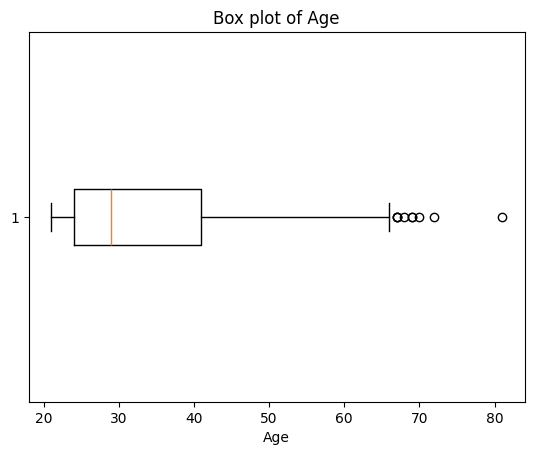

In [11]:
import matplotlib.pyplot as plt
plt.boxplot(input_data['Age'], vert=False)
plt.title('Box plot of Age')
plt.xlabel('Age')
plt.show()

In [13]:
mean_age =input_data['Age'].mean()
std_age = input_data['Age'].std()

lower_bound = mean_age - 2 * std_age
upper_bound = mean_age + 2 * std_age

outliers = input_data[(input_data['Age'] < lower_bound) | (input_data['Age'] > upper_bound)]
outliers.shape , outliers.head()

((47, 9),
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 12           10      139             80              0        0  27.1   
 13            1      189             60             23      846  30.1   
 28           13      145             82             19      110  22.2   
 30            5      109             75             26        0  36.0   
 53            8      176             90             34      300  33.7   
 
     DiabetesPedigreeFunction  Age  Outcome  
 12                     1.441   57        0  
 13                     0.398   59        1  
 28                     0.245   57        0  
 30                     0.546   60        0  
 53                     0.467   58        1  )

In [16]:
input_data_processed = input_data[(input_data['Age'] >= lower_bound) & (input_data['Age'] <= upper_bound)]
input_data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 721 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               721 non-null    int64  
 1   Glucose                   721 non-null    int64  
 2   BloodPressure             721 non-null    int64  
 3   SkinThickness             721 non-null    int64  
 4   Insulin                   721 non-null    int64  
 5   BMI                       721 non-null    float64
 6   DiabetesPedigreeFunction  721 non-null    float64
 7   Age                       721 non-null    int64  
 8   Outcome                   721 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.3 KB
